In [1]:
pip install requests

Importing neccesary libraries 

In [22]:
from bs4 import BeautifulSoup
import requests
import lxml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's set our website with data we need

In [3]:
website = "https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Europe"

Time to Request our webiste

In [4]:
response = requests.get(website)

Is it working?

In [5]:
if response.status_code == 200:
    print("All good")
else:
    print("Failed to retrieve the website")

All good


Perfect!

Let's focus on the table we need right now

In [6]:
def skyscrapersDataGather():  # DataGather
    soup = BeautifulSoup(response.text, 'html.parser')
    skyscraperTable = soup.find('table', {'class':'wikitable'})
    return skyscraperTable

After that, lets transorm our data into DataFrame, and clean it.

In [7]:
df = pd.read_html(str(skyscrapersDataGather()))
df = pd.DataFrame(df[0])
df = df.drop(["Image", "Floors", "Notes", "Ref"], axis=1)
print(df.head())


  Rank                    Name              City Country  Height m (ft)  Year
0    1           Lakhta Center  Saint Petersburg  Russia    462 (1,516)  2019
1    2  Federation: East Tower            Moscow  Russia  373.7 (1,226)  2016
2    3        OKO: South Tower            Moscow  Russia  354.2 (1,162)  2015
3    4            Neva Tower 2            Moscow  Russia    345 (1,132)  2020
4    5      Mercury City Tower            Moscow  Russia  338.8 (1,112)  2013


I want to know, which of the skyscraper is in the EU

In [8]:
euCountries = ["Austria","Belgium","Bulgaria","Croatia","Cyprus","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Latvia","Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden"]

In [10]:
df["EU"] = "No"
df.loc[df["Country"].isin(euCountries), "EU"] = "Yes"
print(df)

    Rank                    Name              City         Country  \
0      1           Lakhta Center  Saint Petersburg          Russia   
1      2  Federation: East Tower            Moscow          Russia   
2      3        OKO: South Tower            Moscow          Russia   
3      4            Neva Tower 2            Moscow          Russia   
4      5      Mercury City Tower            Moscow          Russia   
..   ...                     ...               ...             ...   
84  83 =         Continental[14]            Moscow          Russia   
85    86                     ONE         Frankfurt         Germany   
86    87       HSB Turning Torso             Malmö          Sweden   
87    88             The Scalpel            London  United Kingdom   
88    89                Omniturm         Frankfurt         Germany   

    Height m (ft)  Year   EU  
0     462 (1,516)  2019   No  
1   373.7 (1,226)  2016   No  
2   354.2 (1,162)  2015   No  
3     345 (1,132)  2020   No  
4   

Let's check if there are any NaN in our DataFrame

In [15]:
df.isna().values.any()

False

Great! Now let's do some visualization!

First one, is there more tallest skyscrapers in EU or outside it?

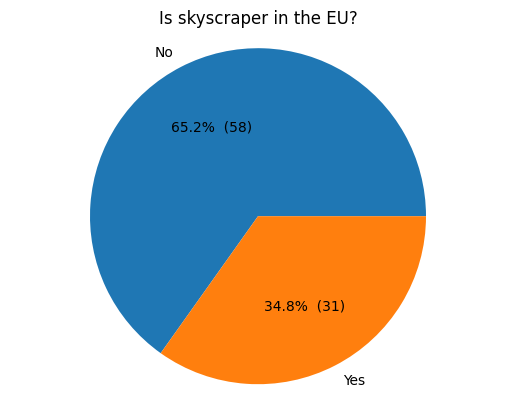

In [21]:
skyscraperInEU = df["EU"].value_counts()
skyscraperCount = df["EU"].count()
percentages = (skyscraperInEU/skyscraperCount) * 100

plt.pie(skyscraperInEU, labels=skyscraperInEU.index, autopct=lambda p: '{:.1f}%  ({:,.0f})'.format(p, (p/100)*skyscraperCount))
plt.axis('equal')
plt.title('Is skyscraper in the EU?')
plt.show()

Most of the skyscrapers is outside the EU!

Now let's check which citie to visit if we want to see tallest skyscrapers.


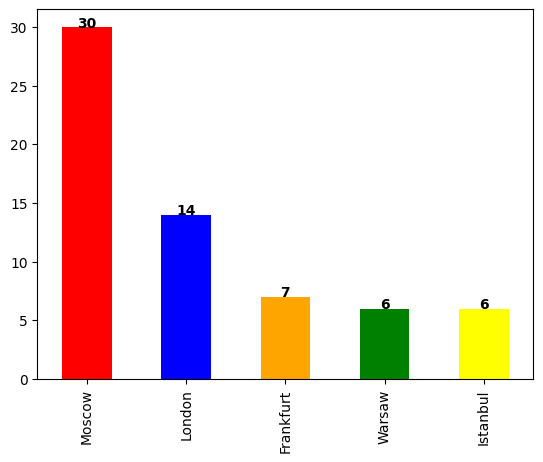

In [26]:
skyscraperCity = df["City"].value_counts()
topFiveCity = skyscraperCity[:5]
colors = ["red", "blue", "orange", "green", "yellow"]
topFiveCity.plot.bar(color=colors)
for i, val in enumerate(topFiveCity):
    plt.text(i, val, str(val), color='black', ha='center', fontweight='bold')


So surely our choice should be Moscow if we want to see a lot of hight buildings.


Now time to check, what are the years that the skyscrapers were build

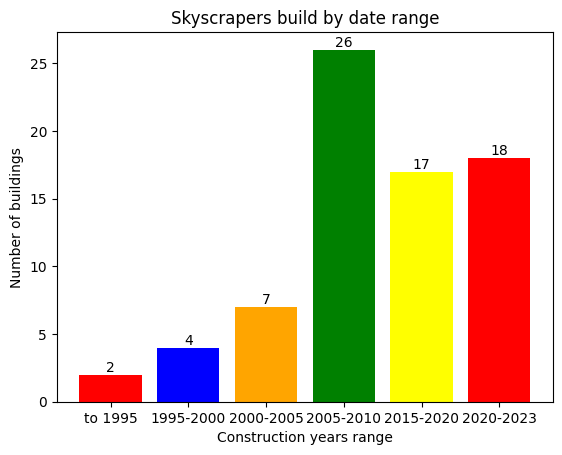

In [36]:
df['YearRange'] = pd.cut(df['Year'],bins=[1995,2000,2005,2010,2015,2020,2023],labels=['to 1995','1995-2000','2000-2005','2005-2010','2015-2020','2020-2023'])
dfCount = df.groupby(['YearRange'])['Year'].count()
colors = ["red", "blue", "orange", "green", "yellow"]
bars=plt.bar(dfCount.index, dfCount.values, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')
plt.xlabel('Construction years range')
plt.ylabel('Number of buildings')
plt.title('Skyscrapers build by date range')
plt.show()